In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re

In [2]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']
data.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [3]:
# function definitions

def injType(x):
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox','ill']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek','mouth','oral','dental']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest','conditioning']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [4]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]

In [5]:
# categorize injury by injury type 
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
injury_data.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,hand/finger
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely),illness
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely),knee
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back


In [7]:
# create a column for 'out indefinitely' or 'out for season'
...

In [8]:
# output to a csv file 
injury_data.to_csv('injury_data.csv')

In [9]:
# count of injury by injury type
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
illness         690
foot            579
back            530
bruise          498
rest            425
hamstring       371
hand/finger     315
shoulder        299
groin           266
calf            225
Misc.           218
hip             195
head            188
wrist           138
arm             135
leg             111
face            109
core            101
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

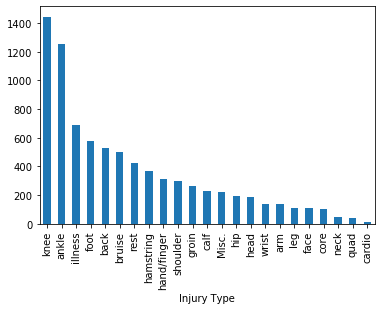

In [10]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [11]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries

,Date,Team,Acquired,Relinquished,Notes,Injury Type
44,2010-11-08,Magic,NaN,Mickael Pietrus,DNP,Misc.
71,2010-11-17,Jazz,NaN,Kyrylo Fesenko,dizziness (DNP),Misc.
84,2010-11-22,Hornets,NaN,Marcus Thornton (T.),DNP,Misc.
394,2011-02-03,Bucks,NaN,Chris Douglas-Roberts,DNP,Misc.
479,2011-02-25,Blazers,NaN,Gerald Wallace,DNP,Misc.
...,...,...,...,...,...,...
9459,2018-02-17,Lakers,NaN,Channing Frye,appendectomy (out indefinitely),Misc.
9472,2018-02-24,Grizzlies,NaN,Marc Gasol,DNP,Misc.
9473,2018-02-24,Lakers,NaN,Channing Frye,recovering from appendectomy (DTD),Misc.
9552,2018-03-13,Clippers,NaN,Avery Bradley,surgery to repair athletic pubalgia / sports h...,Misc.


In [12]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


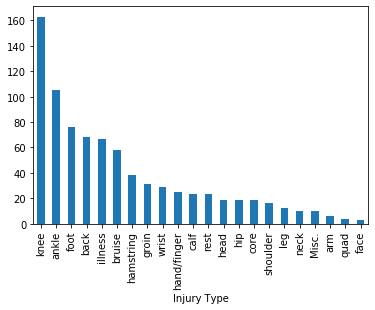

In [13]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


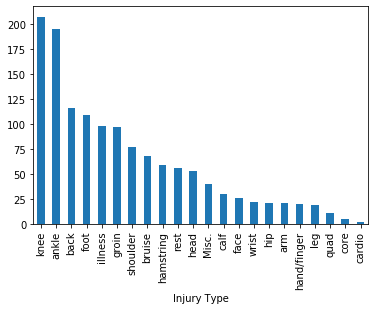

In [14]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


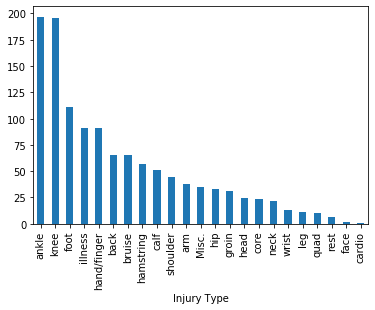

In [15]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


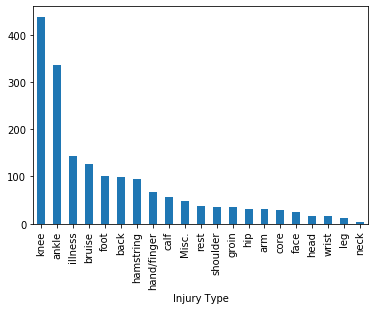

In [16]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


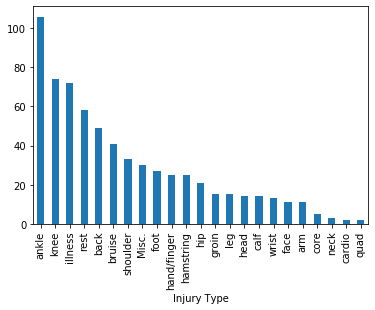

In [17]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

In [18]:
injury_types_14

,Notes
Injury Type,
Misc.,30
ankle,106
arm,11
back,49
bruise,41
calf,14
cardio,2
core,5
face,11


Total number of injuries:  809


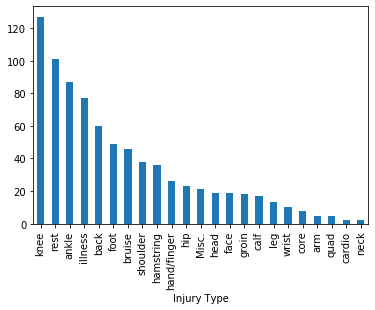

In [19]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


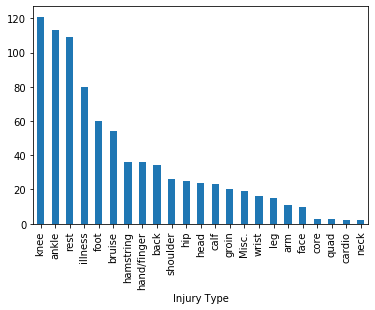

In [20]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


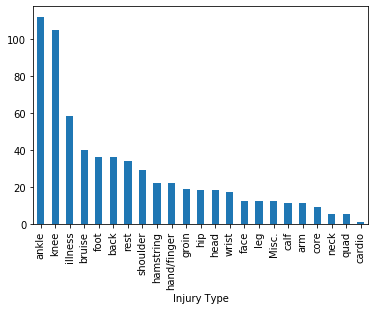

In [21]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [22]:
# nba player per game statistics for each season
list_of_files = [f for f in listdir('nba_player_stats') if isfile(join('nba_player_stats', f))]
list_of_files

['2015-2016_nba_player_stats.txt',
 '2017-2018_nba_player_stats.txt',
 '2014-2015_nba_player_stats.txt',
 '2016-2017_nba_player_stats.txt',
 '2012-2013_nba_player_stats.txt',
 '2013-2014_nba_player_stats.txt',
 '2010-2011_nba_player_stats.txt',
 '2018-2019_nba_player_stats.txt',
 '2011-2012_nba_player_stats.txt']

In [23]:
#what types of players get what types of injuries
#fouls / free throws per minute
#does position / play style correlate with injury frequency? 

In [24]:
stats = pd.read_csv('nba_player_stats/' + list_of_files[0])
pd.set_option('display.max_columns', None)
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy\acyqu01,PF,25,SAC,59,29,14.8,2.0,3.6,0.556,0.3,0.8,0.388,1.7,2.8,0.606,0.600,0.8,1.2,0.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2
1,2,Jordan Adams\adamsjo01,SG,21,MEM,2,0,7.5,1.0,3.0,0.333,0.0,0.5,0.000,1.0,2.5,0.400,0.333,1.5,2.5,0.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5
2,3,Steven Adams\adamsst01,C,22,OKC,80,80,25.2,3.3,5.3,0.613,0.0,0.0,NaN,3.3,5.3,0.613,0.613,1.4,2.5,0.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0
3,4,Arron Afflalo\afflaar01,SG,30,NYK,71,57,33.4,5.0,11.3,0.443,1.3,3.4,0.382,3.7,7.9,0.469,0.500,1.5,1.8,0.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8
4,5,Alexis Ajinça\ajincal01,C,27,NOP,59,17,14.6,2.5,5.3,0.476,0.0,0.0,0.000,2.5,5.3,0.478,0.476,0.9,1.1,0.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,472,Joe Young\youngjo01,PG,23,IND,41,0,9.4,1.5,4.1,0.367,0.2,1.1,0.217,1.3,3.0,0.423,0.396,0.5,0.6,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
574,473,Nick Young\youngni01,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
575,474,Thaddeus Young\youngth01,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
576,475,Cody Zeller\zelleco01,C,23,CHO,73,60,24.3,3.2,6.0,0.529,0.0,0.1,0.100,3.2,5.8,0.539,0.530,2.4,3.2,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


In [25]:
ex = stats['Player'][0]
regname = r".*?(?=\\)"  # use regular expression to extract player name
names = re.findall(regname, ex)
names[0]

'Quincy Acy'

In [26]:
#injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

stats['Player'] = stats['Player'].apply(lambda x: (re.findall(regname,x))[0] )
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,0.556,0.3,0.8,0.388,1.7,2.8,0.606,0.600,0.8,1.2,0.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2
1,2,Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,0.333,0.0,0.5,0.000,1.0,2.5,0.400,0.333,1.5,2.5,0.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5
2,3,Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,0.613,0.0,0.0,NaN,3.3,5.3,0.613,0.613,1.4,2.5,0.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0
3,4,Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,0.443,1.3,3.4,0.382,3.7,7.9,0.469,0.500,1.5,1.8,0.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8
4,5,Alexis Ajinça,C,27,NOP,59,17,14.6,2.5,5.3,0.476,0.0,0.0,0.000,2.5,5.3,0.478,0.476,0.9,1.1,0.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,472,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,0.367,0.2,1.1,0.217,1.3,3.0,0.423,0.396,0.5,0.6,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
574,473,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
575,474,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
576,475,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,0.529,0.0,0.1,0.100,3.2,5.8,0.539,0.530,2.4,3.2,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


In [82]:
stats = stats.drop(columns=["FG%","3P%","2P%","eFG%","FT%"])
stats


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,0.3,0.8,1.7,2.8,0.8,1.2,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2
1,2,Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,0.0,0.5,1.0,2.5,1.5,2.5,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5
2,3,Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,0.0,0.0,3.3,5.3,1.4,2.5,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0
3,4,Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,1.3,3.4,3.7,7.9,1.5,1.8,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8
4,5,Alexis Ajinça,C,27,NOP,59,17,14.6,2.5,5.3,0.0,0.0,2.5,5.3,0.9,1.1,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,472,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,0.2,1.1,1.3,3.0,0.5,0.6,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
574,473,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,1.4,4.4,0.9,2.5,1.2,1.4,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
575,474,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.1,0.4,6.7,12.8,1.4,2.2,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
576,475,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,0.0,0.1,3.2,5.8,2.4,3.2,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


In [83]:
# for i in range(0,len(stats['Player'])):
#     stats['Player'][i] = stats['Player'][i][0]
stats["Player"].apply(lambda x: print(x))
# stats
# bracket = []
# for i in stats['Player']:
#     if  in i:
#         bracket.append(i)
# bracket

Quincy Acy
Jordan Adams
Steven Adams
Arron Afflalo
Alexis Ajinça
Cole Aldrich
LaMarcus Aldridge
Cliff Alexander
Lavoy Allen
Tony Allen
Al-Farouq Aminu
Lou Amundson
Chris Andersen
Chris Andersen
Chris Andersen
Alan Anderson
James Anderson
Justin Anderson
Kyle Anderson
Ryan Anderson
Giannis Antetokounmpo
Thanasis Antetokounmpo
Carmelo Anthony
Joel Anthony
Keith Appling
Trevor Ariza
Darrell Arthur
Ömer Aşık
D.J. Augustin
D.J. Augustin
D.J. Augustin
Jeff Ayres
Luke Babbitt
Cameron Bairstow
Leandro Barbosa
J.J. Barea
Andrea Bargnani
Harrison Barnes
Matt Barnes
Will Barton
Brandon Bass
Nicolas Batum
Jerryd Bayless
Aron Baynes
Kent Bazemore
Bradley Beal
Michael Beasley
Marco Belinelli
Anthony Bennett
Patrick Beverley
Bismack Biyombo
Nemanja Bjelica
Tarik Black
DeJuan Blair
Steve Blake
Eric Bledsoe
Bojan Bogdanović
Andrew Bogut
Matt Bonner
Devin Booker
Trevor Booker
Chris Bosh
Avery Bradley
Elton Brand
Corey Brewer
Aaron Brooks
Anthony Brown
Lorenzo Brown
Markel Brown
Kobe Bryant
Chase Budinge

0      None
1      None
2      None
3      None
4      None
       ... 
573    None
574    None
575    None
576    None
577    None
Name: Player, Length: 578, dtype: object

In [86]:
query_str = 'Player == "Chris Andersen"'
bird_id = stats.query(query_str)
bird_id.iloc[:,5:31]





,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12,27,15,14.9,1.4,2.7,0.1,0.5,1.3,2.1,0.9,1.3,1.3,2.3,3.6,0.4,0.6,0.5,0.3,1.1,3.9
13,7,1,5.1,0.6,1.4,0.3,0.7,0.3,0.7,0.4,0.6,0.4,0.9,1.3,0.4,0.1,0.4,0.3,0.6,1.9
14,20,14,18.3,1.7,3.1,0.1,0.5,1.6,2.7,1.1,1.6,1.7,2.8,4.5,0.5,0.7,0.5,0.4,1.3,4.6


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False,False,True,False,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
574,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
575,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,False
576,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [29]:
mkdir ./shotchart

mkdir: cannot create directory ‘./shotchart’: File exists


In [30]:
!unzip -o nba-2018-19.zip -d shotchart

Archive:  nba-2018-19.zip
  inflating: shotchart/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0  
  inflating: shotchart/commonTeamYears?LeagueID=00&Season=2018-19  
  inflating: shotchart/shotchartdetail?PlayerID=101106&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101107&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101108&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotch

In [31]:
filecount = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
| cut -d '&' -f 1 \
| cut -d '?' -f 2 \
| sort -n \
| uniq \
| wc -l
filecount


['502']

In [32]:
uniqueshotfiles = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
| cut -d '&' -f 1 \
| cut -d '?' -f 2 \
| sort -n \
| uniq \

uniqueshotfiles

['PlayerID=101106',
 'PlayerID=101107',
 'PlayerID=101108',
 'PlayerID=101109',
 'PlayerID=101112',
 'PlayerID=101123',
 'PlayerID=101133',
 'PlayerID=101139',
 'PlayerID=101141',
 'PlayerID=101150',
 'PlayerID=101161',
 'PlayerID=101181',
 'PlayerID=1626143',
 'PlayerID=1626144',
 'PlayerID=1626145',
 'PlayerID=1626147',
 'PlayerID=1626149',
 'PlayerID=1626153',
 'PlayerID=1626154',
 'PlayerID=1626155',
 'PlayerID=1626156',
 'PlayerID=1626157',
 'PlayerID=1626158',
 'PlayerID=1626159',
 'PlayerID=1626161',
 'PlayerID=1626162',
 'PlayerID=1626163',
 'PlayerID=1626164',
 'PlayerID=1626167',
 'PlayerID=1626168',
 'PlayerID=1626169',
 'PlayerID=1626170',
 'PlayerID=1626171',
 'PlayerID=1626172',
 'PlayerID=1626174',
 'PlayerID=1626178',
 'PlayerID=1626179',
 'PlayerID=1626181',
 'PlayerID=1626184',
 'PlayerID=1626185',
 'PlayerID=1626187',
 'PlayerID=1626188',
 'PlayerID=1626192',
 'PlayerID=1626195',
 'PlayerID=1626196',
 'PlayerID=1626203',
 'PlayerID=1626204',
 'PlayerID=1626209',
 'Pl

In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
json_obj = json.loads(json_str[0])
#print(json_obj.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allteams = pd.DataFrame(d,columns =h )

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
json_obj = json.loads(json_str[0])
#print(json_obj.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allteams = pd.DataFrame(d,columns =h )

In [35]:
json_str = !cat shotchart/commonallplayers\?LeagueID\=00\&Season\=2018-19\&IsOnlyCurrentSeason\=0
json_obj = json.loads(json_str[0])
#print(json_obj1.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allplayers = pd.DataFrame(d,columns =h ).set_index('PERSON_ID')
allplayers

,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
PERSON_ID,,,,,,,,,,,,,
76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y,00
76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y,00
76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y,00
51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y,00
1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627790,"Zizic, Ante",Ante Zizic,1,2017,2019,ante_zizic,1610612739,Cleveland,Cavaliers,CLE,cavaliers,Y,01
78647,"Zoet, Jim",Jim Zoet,0,1982,1982,HISTADD_jim_zoet,0,,,,,Y,00
78648,"Zopf, Bill",Bill Zopf,0,1970,1970,HISTADD_zip_zopf,0,,,,,Y,00


In [36]:
allshotslist = []

files = !ls -1 shotchart/shotchartdetail*
for f in files:
    json_str = !cat '{f}'
    json_obj = json.loads(json_str[0])
    h = json_obj['resultSets'][0]['headers']
    d = json_obj['resultSets'][0]['rowSet']
    allshotslist.append(pd.DataFrame(d,columns =h ))
    
allshots = pd.concat(allshotslist)

In [37]:
allshots

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021801055,25,101106,Andrew Bogut,1610612744,Golden State Warriors,1,10,39,Made Shot,Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-2,11,1,1,20190318,SAS,GSW
1,Shot Chart Detail,0021801055,73,101106,Andrew Bogut,1610612744,Golden State Warriors,1,6,7,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-5,3,1,1,20190318,SAS,GSW
2,Shot Chart Detail,0021801055,284,101106,Andrew Bogut,1610612744,Golden State Warriors,2,1,55,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-5,21,1,1,20190318,SAS,GSW
3,Shot Chart Detail,0021801055,378,101106,Andrew Bogut,1610612744,Golden State Warriors,3,6,19,Missed Shot,Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,8,-17,83,1,0,20190318,SAS,GSW
4,Shot Chart Detail,0021801062,25,101106,Andrew Bogut,1610612744,Golden State Warriors,1,9,52,Missed Shot,Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,4,2,1,0,20190319,MIN,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Shot Chart Detail,0021801069,271,2772,Trevor Ariza,1610612764,Washington Wizards,2,2,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,150,202,1,0,20190320,CHI,WAS
732,Shot Chart Detail,0021801116,42,2772,Trevor Ariza,1610612764,Washington Wizards,1,7,38,Made Shot,Driving Floating Bank Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-25,46,1,1,20190326,LAL,WAS
733,Shot Chart Detail,0021801116,48,2772,Trevor Ariza,1610612764,Washington Wizards,1,7,13,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,169,194,1,0,20190326,LAL,WAS
734,Shot Chart Detail,0021801116,63,2772,Trevor Ariza,1610612764,Washington Wizards,1,6,7,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-220,71,1,1,20190326,LAL,WAS


In [38]:
##query data for specific players
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = allplayers.query(query_str).index[0]

curry_data = allshots.query('PLAYER_NAME == "Stephen Curry"').astype({'SHOT_MADE_FLAG':'int'})

In [39]:
#field goal percentage table
FGpercent_table = pd.pivot_table(curry_data, values = 'SHOT_MADE_FLAG', index = "PERIOD", columns = ["SHOT_ZONE_RANGE", "SHOT_ZONE_AREA"], fill_value = 0 )
FGpercent_table



SHOT_ZONE_RANGE 16-24 ft.                                    \
SHOT_ZONE_AREA  Center(C) Left Side Center(LC) Left Side(L)   
PERIOD                                                        
1                0.444444             0.200000     0.111111   
2                1.000000             0.625000     0.285714   
3                0.428571             0.333333     0.400000   
4                0.300000             0.666667     1.000000   
5                0.000000             0.000000     1.000000   

SHOT_ZONE_RANGE                                       24+ ft.  \
SHOT_ZONE_AREA  Right Side Center(RC) Right Side(R) Center(C)   
PERIOD                                                          
1                            0.411765      1.000000  0.558824   
2                            0.533333      0.500000  0.406250   
3                            0.636364      0.500000  0.437500   
4                            0.250000      0.333333  0.379310   
5                            0.000000      0.000000  0.666667   

SHOT_ZONE_RANGE                                                          \
SHOT_ZONE_AREA  Left Side Center(LC) Left Side(L) Right Side Center(RC)   
PERIOD                                                                    
1                           0.371795     0.636364              0.387097   
2                           0.558824     0.437500              0.351852   
3                           0.506849     0.500000              0.378049   
4                           0.325000     0.461538              0.467742   
5                           0.000000     1.000000              0.000000   

SHOT_ZONE_RANGE                8-16 ft.                             \
SHOT_ZONE_AREA  Right Side(R) Center(C) Left Side(L) Right Side(R)   
PERIOD                                                               
1                    0.500000  0.571429     0.428571      0.500000   
2                    0.400000  0.636364     0.333333      0.285714   
3                    0.619048  0.285714     0.727273      0.375000   
4                    0.000000  0.400000     0.166667      0.500000   
5                    0.000000  0.000000     0.000000      0.000000   

SHOT_ZONE_RANGE Back Court Shot Less Than 8 ft.  
SHOT_ZONE_AREA   Back Court(BC)       Center(C)  
PERIOD                                           
1                      0.333333        0.591837  
2                      0.000000        0.636364  
3                      0.000000        0.573171  
4                      0.000000        0.565217  
5                      0.000000        1.000000

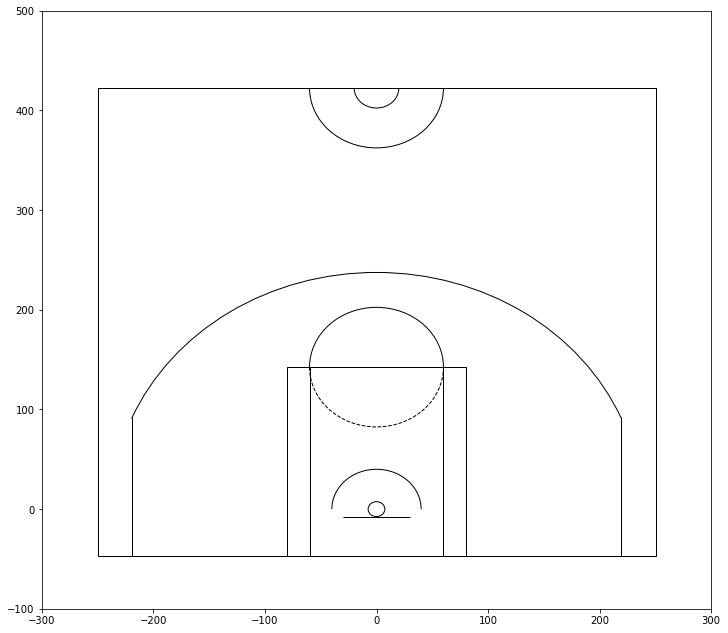

In [40]:
#draw basketball court
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

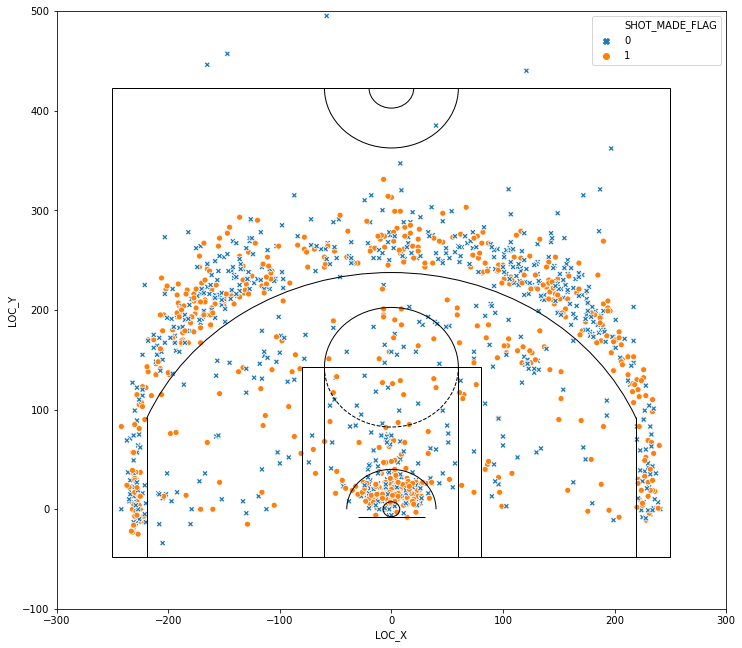

In [41]:
#visualize shots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(data=curry_data, x = 'LOC_X', y = 'LOC_Y', style = "SHOT_MADE_FLAG", hue = "SHOT_MADE_FLAG", markers = markers )
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()